In [33]:
%run MonteCarlo.ipynb
da = testDataAnalysis()

0.4098441225233594
-2.761266563016918

0.4098441225233594
-2.1287592420941728

-0.21097166933462494 -0.3380331322602458 0.9171829458905616


In [35]:
mc = testDataAnalysis(load=True, eventfile="./data/new_moo/MC_events.csv", clusterfile="./data/new_moo/MC_clusters.csv")

In [45]:
data = testDataAnalysis()
data.load_eventdf('data/path/old/new_events.csv')
data.load_clusterdf('data/path/old/clusters.csv')
data.filter_fit(3.5, 5) #(NRMSE, channels)
len(data.get_clusterdf())

df = data.get_clusterdf()['Azimuth'].values * 180 / np.pi - 90
df += (df < -90 ) * 180
data.clusterdf['Azimuth'] = df * np.pi/180

data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Fitline
0,0,7,7,5116.891,0.490,0.867837,0.433943,1.344768,1,0,"[-289.674793, -116.284249, -278.613511, 0.4097..."
1,1,6,6,7194.337,0.502,0.842118,0.376921,1.362154,0,0,"[136.913053, 50.8873995, 294.053676, 0.3600774..."
8,8,6,5,26158.403,0.232,0.910791,0.375099,-1.002101,0,0,"[305.112058, -125.743425, 225.973484, 0.308700..."
9,9,6,6,27250.906,1.288,0.967922,0.944834,1.136773,0,0,"[154.65442528, 249.41452583, -332.64250715, 0...."
10,10,6,6,29660.033,0.226,1.114993,0.627590,-0.433326,0,0,"[193.42700764, -210.87232456, 113.65127237, -0..."
...,...,...,...,...,...,...,...,...,...,...,...
780,780,11,8,2710760.519,0.903,1.621933,0.649071,1.478331,13,5,"[-29.427273, 192.436364, 131.818182, -0.601865..."
785,785,11,11,2728511.764,0.730,0.940687,0.553714,0.828882,2,0,"[-311.313853, -7.322143, -329.147895, -0.38764..."
787,787,8,8,2747006.328,0.537,0.977861,1.155972,0.232221,0,0,"[-40.058751, 296.866403, -176.242091, 0.210620..."
788,788,5,5,2747961.339,0.108,1.479181,0.935113,-0.759964,0,1,"[-324.260894, -206.604814, -296.024824, 0.5543..."


(-100.0, 100.0)

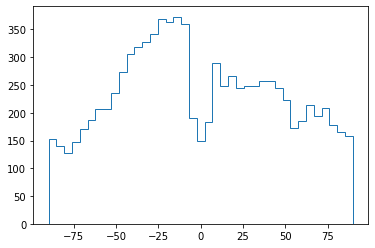

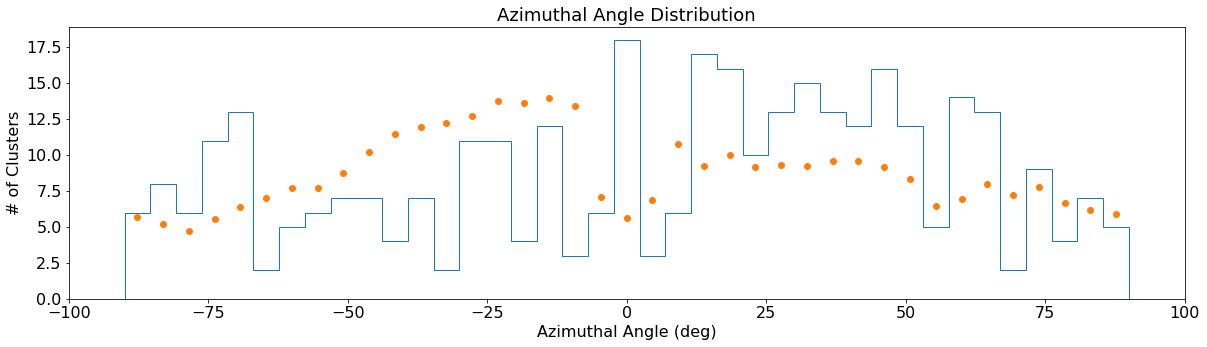

In [46]:
#### plt.figure()
array=plt.hist([phi*180/np.pi for phi in mc.get_clusterdf()['Azimuth']], np.linspace(-90, 90,40), histtype='step')
#array=plt.hist([da.azimuth(line)*180/np.pi for line in mc.get_clusterdf()['Fitline']], np.linspace(-90, 90,40), histtype='step')


plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,40), histtype='step')
#plt.hist([da.azimuth(line)*180/np.pi for line in data.get_clusterdf()['Fitline']], np.linspace(-90,90,40), histtype='step')



bounds = np.array([(array[1][i] + array[1][i+1])/2  for i in range(len(array[1]) - 1)])
plt.scatter(bounds, array[0] * 341 / len(mc.get_clusterdf()))

plt.xlim(-100,100)

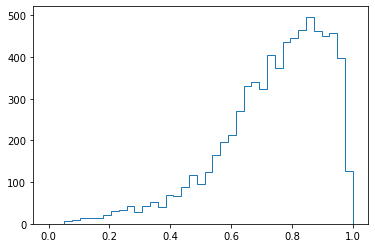

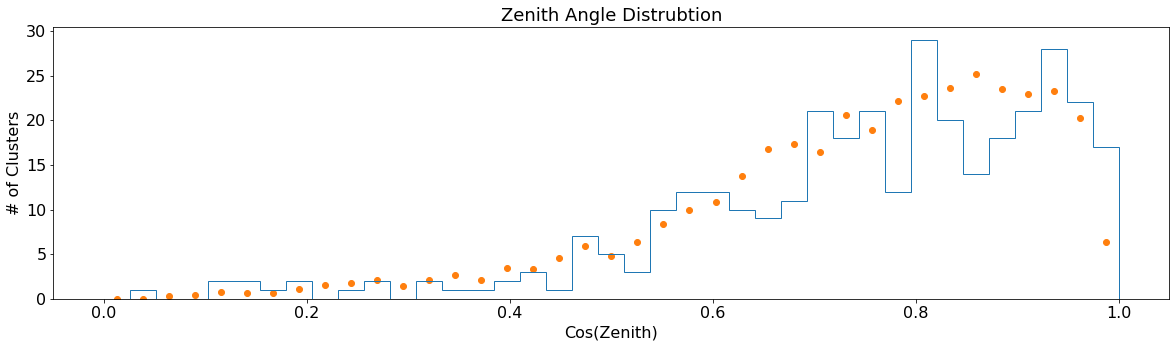

In [19]:
array = plt.hist([math.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1,40), histtype='step')

plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1,40), histtype='step')

bounds = [(array[1][i] + array[1][i+1])/2  for i in range(len(array[1]) - 1)]
plt.scatter(bounds, array[0] * 369 / len(mc.get_clusterdf()))